# Description of Study
Here, we will try to use hierarchical clustering assignments from before (k=4) and see if we can separate top 5 teams fronm the rest. We will also look at the centroids to see what features these teams share.

![caption](k_4_performance_graphs.png)

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())
teams = pd.read_pickle('C:/Users/musta/Desktop/Fall 2020/Thesis/thesis_soccer/processed_data/teams.pkl.gz')

In [14]:
df_assignments = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_assignments.pkl.gz'))
tmp = df_assignments[['name', 'area.name']].reset_index().rename({'name': 'Team', 'area.name': 'League', 'cluster': 'Cluster'},axis=1).sort_values(by=['League', 'Team'])
tmp[['League', 'Team', 'Cluster']].reset_index(drop=True).set_index(['League']).to_latex('assignments.tex')

### Cluster Assignments & Data

In [2]:
df_assignments = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_assignments.pkl.gz'))
scaled_data = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_data.pkl.gz'))

In [3]:
df_assignments.sort_values(by='rank').head(10)

,name,area.name,avg_pass_per_game,avg_shots_per_game,end_of_season_pts,goals_scored,goals_conceded,GD,rank,pezzali,conversion_rate
cluster,,,,,,,,,,,
1,Juventus,Italy,566.289474,12.657895,2.500000,2.263158,0.631579,62,1.0,1.298187,0.160045
3,Manchester City,England,724.289474,15.868421,2.631579,2.789474,0.710526,79,1.0,0.889747,0.158587
1,Barcelona,Spain,612.105263,13.210526,2.447368,2.605263,0.763158,70,1.0,2.071840,0.178221
3,Bayern M\u00fcnchen,Germany,647.500000,15.735294,2.470588,2.705882,0.823529,64,1.0,1.292192,0.166983
1,PSG,France,629.157895,14.684211,2.447368,2.842105,0.763158,79,1.0,1.589880,0.159919
0,Schalke 04,Germany,400.382353,10.382353,1.823529,1.558824,1.088235,16,2.0,0.911006,0.114577
3,Napoli,Italy,707.210526,15.921053,2.394737,2.026316,0.763158,48,2.0,0.894945,0.104364
2,France,France,418.736842,11.289474,2.105263,2.236842,1.184211,40,2.0,1.800506,0.190640
2,Atl\u00e9tico Madrid,Spain,429.894737,9.315789,2.078947,1.526316,0.578947,36,2.0,1.457358,0.152051


# Case Study 1: Cluster 3


<AxesSubplot:title={'center':'Hierarchical Clustering Centroids'}>

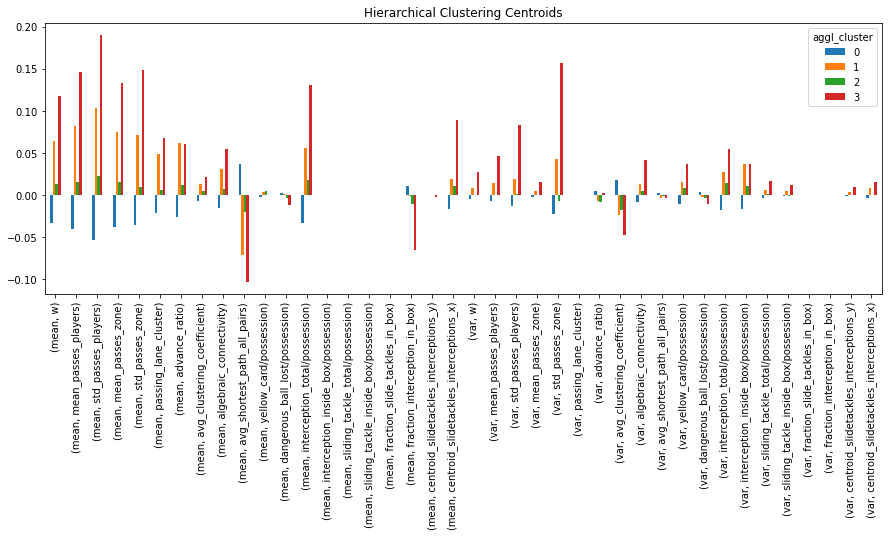

In [4]:
scaled_data.groupby('aggl_cluster').mean().T.plot(kind='bar', figsize=(15,5), title='Hierarchical Clustering Centroids')

### Remarks: Cluster Description

**Here we see that teams in cluster 3 is shows one of the more extreme centroids in feature space. In particular, the standarized scores show an significantly high:**

1) Number of Passes (Mean)  
2) Mean Number of Passes Across Players (Mean)  
3) Std Number of Passes Across Players (Mean)  
4) Mean Number of Passes Across Zones (Mean)  
5) Std Number of Passes Across Zones (Std)  
6) Passing Lane Cluster (Mean)  
7) Advance Ratio (Mean)  
8) Algebraic Connectivity (Mean)   
9) Std Number of Passes Across Zones (Variance)  
10) X-Centroid of Slide Tackles/Interceptions (Mean)    
11) Std Number of Passes Across Players (Variance)  
12) Interceptionsby opportunity (Mean)  


**We also see significantly below mean standardized scores for:**

1) Shortest Paths All Pairs (Mean)  
2) Average Shortest Path All Pairs (Mean)  
3) Fraction of Interceptions in Box (Mean)  
4) Average Clustering Coefficient (Variance) 





### What are the Teams Here?

In [5]:
df_assignments.loc[df_assignments.index==3].sort_values(by='rank')

,name,area.name,avg_pass_per_game,avg_shots_per_game,end_of_season_pts,goals_scored,goals_conceded,GD,rank,pezzali,conversion_rate
cluster,,,,,,,,,,,
3,Manchester City,England,724.289474,15.868421,2.631579,2.789474,0.710526,79,1.0,0.889747,0.158587
3,Bayern M\u00fcnchen,Germany,647.500000,15.735294,2.470588,2.705882,0.823529,64,1.0,1.292192,0.166983
3,Napoli,Italy,707.210526,15.921053,2.394737,2.026316,0.763158,48,2.0,0.894945,0.104364
3,Liverpool,England,586.000000,15.789474,1.973684,2.210526,1.000000,46,4.0,0.687979,0.136316
3,Borussia Dortmund,Germany,536.029412,12.882353,1.617647,1.882353,1.382353,17,4.5,0.905849,0.141298


**There are only 5 Teams. 2 of them are champions in their respective leagues. All are top 5, and with the exception of Borissia Dortmund, they are all champions' league qualifiers.**

**What's special about Dortmund?**

In [13]:
teams.loc[teams['name'].isin(['Borussia Dortmund'])]

,city,name,wyId,officialName,type,area.name,area.id,area.alpha3code,area.alpha2code
30,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE


In [52]:
anomalies = scaled_data.loc[scaled_data.index.isin([2447])].iloc[:, :-1]
anomalies = anomalies.rename({2447: 'Borussia Dortmund'})
avg = scaled_data.loc[(scaled_data.iloc[:, -1]==3) & ~(scaled_data.index.isin([2447]))].iloc[:, :-1].mean().to_frame('Avg Excluding Anomalies').T
tmp = scaled_data.loc[(scaled_data.iloc[:, -1]==3) & ~(scaled_data.index.isin([2447]))].iloc[:, :-1]
yerr = tmp.sem().to_frame('yerr')
yerr_0 = pd.DataFrame(0, index=yerr.index, columns=['yerr_0'])

errors = pd.concat([yerr, yerr_0], axis=1)

<AxesSubplot:>

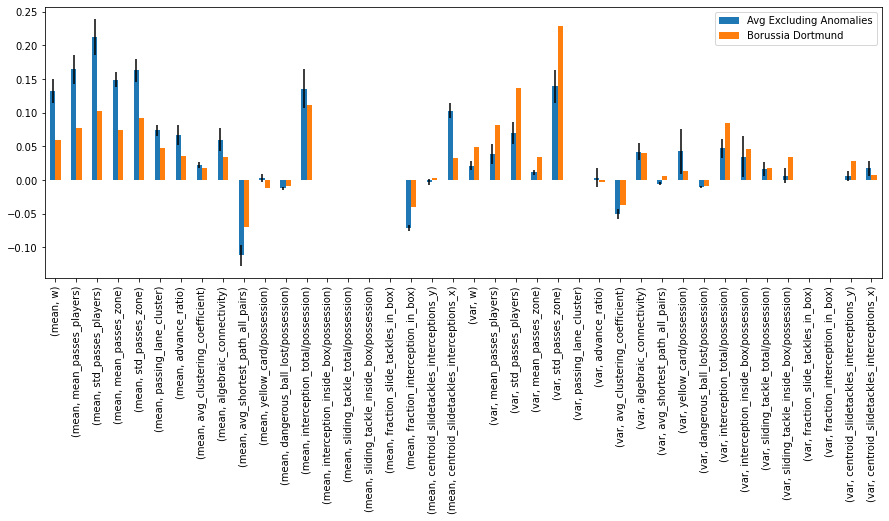

In [54]:
pd.concat([avg, anomalies], axis=0).T.plot(yerr=errors.values.T, kind='bar', figsize=(15, 5))

### Remarks: Dortmund Vs Others
Here we see potential reasons why Borussia Dortmund may be an anomally. First, it is consistently below average on the following metrics which showed positive correlation with performance:   

1) Number of Passes (Mean)  
2) Average Passes Across Players (Mean)  
3) Std Passes Across Players (Mean)  
5) Average Passes Across Zones (Mean)  
6) Std Passes Across Zones (Mean)  
7) X Centroid of Slide Tackles & Interceptions (Mean) 

Therefore, on average, Dortmund has lower overall passing volume, lower passing volume across zones, lower passing valume amongst players than the rest of the teams in the cluster. They intercept/slide tackle closer to their goal than the other 4 teams. They are show a lower average coexistance of hot and cold field zones, and active/passive players  




Also, the variance of some features is particularly high, indicating Borussia Dortmund was a lot more inconsistent game-game than the other 4 teams. This high variance was observed for:  

1) Std Passes Across Zones  
2) Std Passes Across Players  
3) Mean Passes Across Zones  
4) Mean Passes Across Players


Thus, Dortmund is also inconsistent in the sense that there is a lot more dispersion wrt the existence of hot and cold zones, active/passive players. There is also inconsistency in game to game behavior of the average passing volume per player and the average passing volume across the zones. 

